Hi! This is some code to get you started playing around in the last millennium dataset.

These are some modules I like to have loaded in to be able to plot and run some simple analysis. The mpl.rcParams sets plot characteristics for the whole notebook so I don't have to pick every time, but you can change things if you think labels or the figures should be larger or smaller.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cartopy.util as util
import matplotlib as mpl
from glob import glob
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import scipy.stats as stats

mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16

This is where the data are stored on the ncar server - the whole thing is called glade, then it is in a collection called cmip6, because that is the simulation set it belongs to. The section that starts b.e21 tells us about the dataset: b.e21.BWmaHIST is the compset (component set), which tells us what model components this dataset/simulation used. F19_g17 tells us the resolution, then the PMIP4 tells us what the datset is for, ocn for ocean, proc means the data has been processed, tseries means it has been seperated into variable timeseries, and month_1 means the timeseries is monthly.

In [5]:
casePath='/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/month_1/'
caseName='b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002'

Look around a little bit! For example, I can use !ls and change some of the path to see to yearly data instead of monthly data as seen below. The ! allows us to use unix commands in jupyter. Can you get to land output instead of ocean output?

In [6]:
#!ls /glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002/ocn/proc/tseries/year_1/

We want to look at sea surface temperature, so we are going to open temperature data, but you could open anything. The list of variables in CESM are here: https://www.cesm.ucar.edu/community-projects/lens2/output-variables

In [7]:
case = casePath + caseName + '.pop.h.' + 'TEMP.*' + '.nc' #sample one 0020-12.nc' 
data = xr.open_mfdataset(case)

Now you have temperature data for every layer and every month of the time period. You can look at the data properties by calling data. There are a bunch of different data variables, even though we only opened temperature files - they accompany the temperature files. The dimensions tell us, among other things that we have 384 latitude points, 320 longitude points, 12000 time units (12000 months = 1000 years), and z_t=60, which means there are 60 different levels to the ocean. The attribute section tells us the history of the data.

In [8]:
data

<xarray.Dataset>
Dimensions:                 (time: 12000, moc_comp: 3, transport_comp: 5,
                             transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60,
                             z_w_top: 60, z_w_bot: 60, lat_aux_grid: 395,
                             moc_z: 61, nlat: 384, nlon: 320, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time                    (time) object 0850-02-01 00:00:00 ... 1850-01-01 ...
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (time, moc_comp) |S384 dask.array<chunksize=(600, 3), meta=np.ndarray>
    transport_components    (time, transport_comp) |S384 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions       (time, transport_reg) |S384 dask.array<chunksize=(600, 2), meta=np.ndarray>
    dz                      (time, z_t) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    dzw                     (time, z_w) float32 dask.array<chunksize=(600, 60), meta=np.ndarray>
    KMT                     (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                      ...
    salinity_factor         (time) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (time) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (time) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (time) float64 8.297e+04 8.297e+04 ... 8.297e+04
    time_bound              (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    TEMP                    (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BWmaHIST.f19_g17.PMIP4-past1000.002
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2020-08-29 at 18:17:31.8
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

We want to figure out whether the ENSO region was in an El Nino state - based on the definition given in the El Nino paper, we need to see if a five month running mean of sea surface temperature data in the Nino 3.4 region (5 N to 5 S, 120 W to 170 W) before the eruption exceeded 0.4 C (El Nino) for six months or more or was less than -0.5 C for six months or more (La Nina). So first, we have to find mean SST for each month as a base comparison. Modern definitions use the period from 1950 to 1979 as a comparison, but we will use the 30 year period from 1000 CE to 1030 CE.

In [9]:
monthly_data= {}; months = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec'] #defining months
month_ind =(1000-850)*12 ;#want to start at the first month of year 1000
for month in months:
    print(month)
    current_month_data = np.zeros([30,384,320]) ; current_month_data[:] == np.nan #30 years for every latitude and longitude
    year = 0
    for i in range(0,len(data['time'][:360])+1,12 ): #defining years, 360 is 30 x 12
        try:
            current_month_data[year,:,:] =data['TEMP'][:,0,:,:][month_ind+i,:,:]
        except:
            print(' ')
    
        year+=1
    month_ind +=1
    monthly_data[month] = np.mean(current_month_data, axis = 0)

jan
 
feb
 
mar
 
apr
 
may
 
jun
 
jul
 
aug
 
sept
 
oct
 
nov
 
dec
 


Now we have monthly climatologies for the years 1000 to 1030!

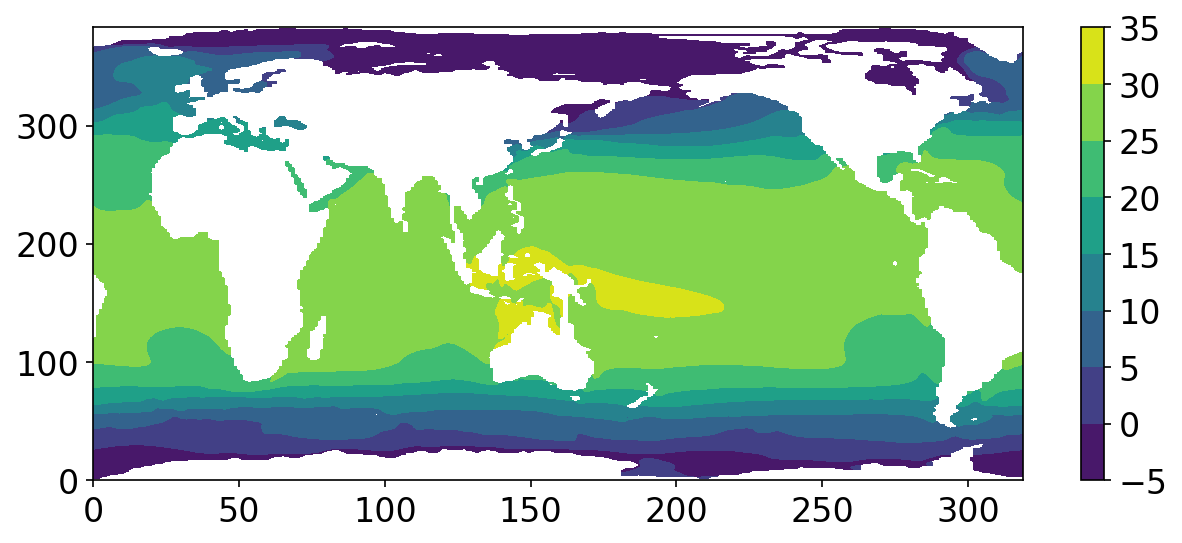

In [13]:
p=plt.contourf(monthly_data['jan'])
plt.colorbar(p) #here is january

Next we need to define the Nino 3.4 region. To do this, we will add latitude-longitude lines to our data.

This is a function that lets us plot the ocean data in different projections. It can get kind of funky if we don't use this because we are changing the frames of lat-long and cartopy can get confused about what the coordinates are called. It basically wraps the data into a circle so we can choose to start and end a flat map frame at any longitude point.

In [14]:
def pop_add_cyclic(data,TLAT,TLONG): 
    nj = TLAT.shape[0] # size of POP grid
    ni = TLONG.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)
    tlon = TLONG
    tlat = TLAT
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon) #make monotoncially increasing
    lon  = np.concatenate((tlon, tlon + 360.), 1) # concatenate to make larger array
    lon = lon[:, xL:xR] #restrict to middle rane
    if ni == 320: # this is the x1 POP grid
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    lon = np.hstack((lon, lon[:, 0:1] + 360.)) # add in cyclic point
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.
    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8
    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))
    lon_dim = 1 #ds[v].dims.index('nlon')
    field = data
    field = np.concatenate((field, field), 1)
    field = field[:, xL:xR]
    field = np.concatenate((field, field[:, 0:1]), lon_dim)
    
    return field, lat, lon

In [19]:
#this will take a while to run :( so I would not do it unless you want to plot the data
plot_data,new_lats,new_lons = pop_add_cyclic(monthly_data['jan'],data['TLAT'],data['TLONG']) 

In [22]:
plot_data.shape

(384, 321)

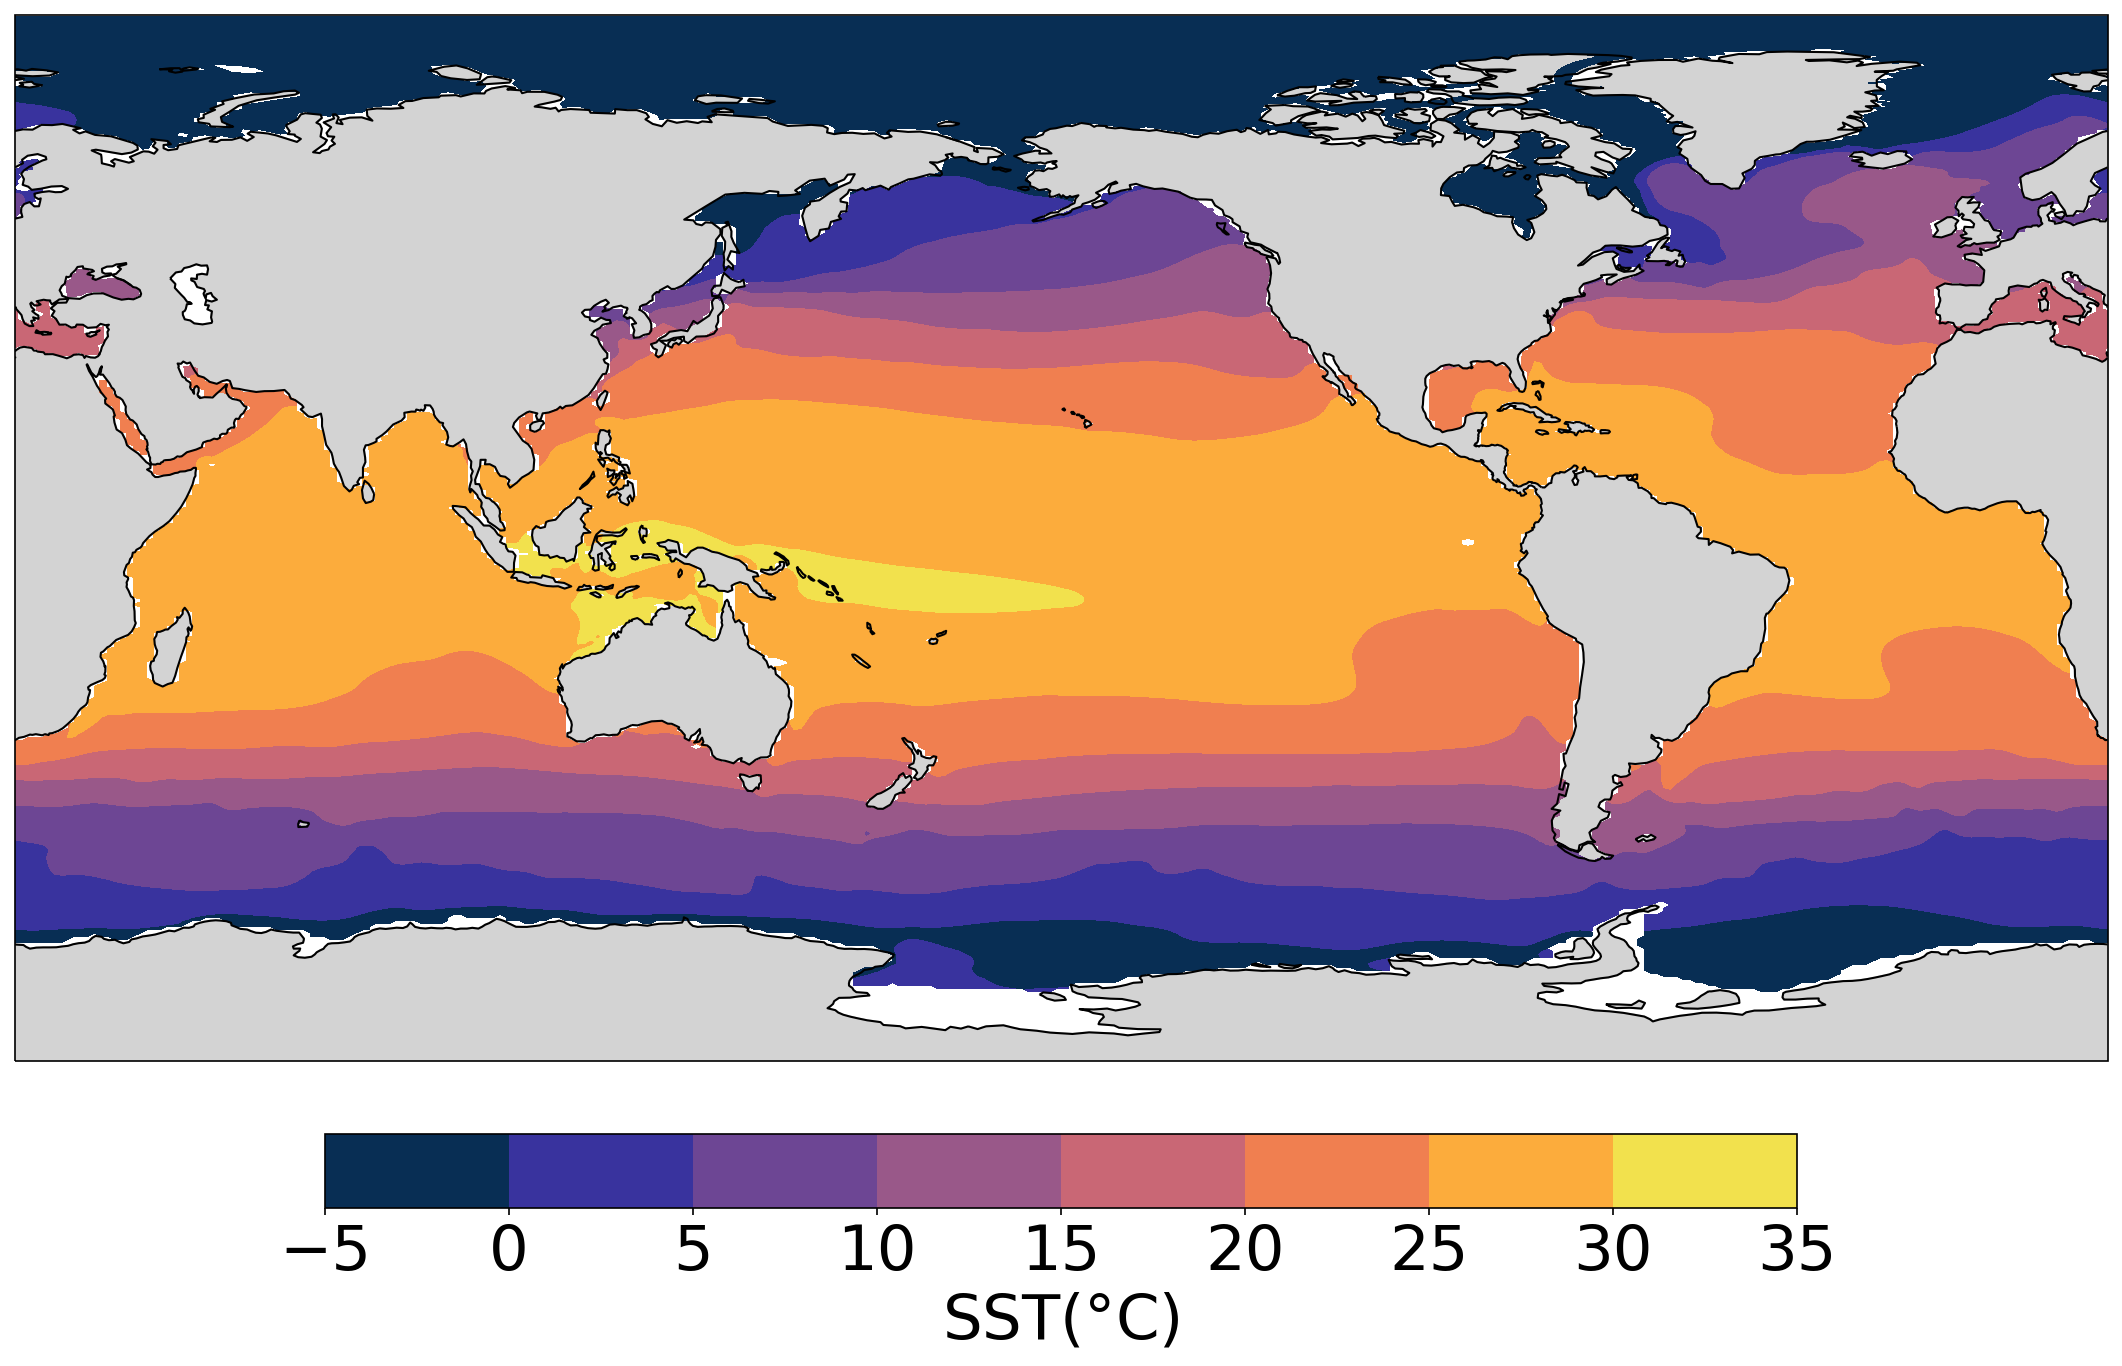

In [23]:
#now we can plot in different projections and make prettier graphics
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude = -160)))

ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


p = plt.contourf(new_lons,new_lats,plot_data,
                transform=ccrs.PlateCarree(),cmap = cmocean.cm.thermal,zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('SST' + "($\degree$C)", size = 30)

Now we can create anomalies of the ocean during the eruption year. We will do this by subtracting the climatology for a month from that month of SST data in the model, in the year before the eruption. Then we will take a running mean of the six months before the eruption anomaly data, with a running mean periodicity of five months.

## Get the lat and lon locations for the El Nino region: 

In [24]:
#tlat is degrees north
data['TLAT'][206,50].values

array(5.18019218)

In [25]:
data['TLAT'][167,50].values

array(-5.2090898)

In [26]:
#tlong is degrees east
#converting from east to west is subtracting 360
abs(data['TLONG'][50,203].values-360)

171.06249474233516

In [27]:
#tlong is degrees east
#converting from east to west is subtracting 360
abs(data['TLONG'][50,248].values-360)

120.43749333356618

## Getting a running mean

### Volcano 1: Samalas 1257 CE

#### Preconditions El Nino/Neutral/La Nina

You can find the top 10 eruptions in Table 2 of Toohey and Sigl 2017 - just look for the large eruptions between 850 and 1850.

In [28]:
#getting a monthly mean of surface temperature data for the year of the samalas eruption - it is loaded in as jan 1257 so we will do 1256
samalas = data.sel(time=slice('1256-01-01 00:00:00','1256-12-31 00:00:00')).groupby('time.month').mean(dim='time')

We made monthly climatologies as a simple directory above, because in this case they sometimes run faster for simple data plotting. Now we want to subtract an xarray dataarray from the climatologies though, so we will remake them as a xarray dataarray so we don't run into any formatting errors.

In [29]:
monthlydata=data.sel(time=slice('1000-01-01 00:00:00','1030-12-31 00:00:00')).groupby('time.month').mean(dim='time')

/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/u/apps/opt/conda/envs/npl/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/gla

In [30]:
monthlydata

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             month: 12, nlat: 384, nlon: 320)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 0.0001 0.0001 ... 0.0001 0.0001
    salinity_factor         (month) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (month) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (month) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (month) float64 8.297e+04 8.297e+04 ... 8.297e+04
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [31]:
samalas

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             month: 12, nlat: 384, nlon: 320)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 0.0001 0.0001 ... 0.0001 0.0001
    salinity_factor         (month) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (month) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (month) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (month) float64 8.297e+04 8.297e+04 ... 8.297e+04
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [32]:
samalas_anomaly=samalas-monthlydata
samalas_anomaly

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, month: 12)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 4.066e-20 4.066e-20 ... 4.066e-20
    salinity_factor         (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sflux_factor            (month) float64 -2.776e-17 -2.776e-17 ... -2.776e-17
    nsurface_t              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nsurface_u              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [33]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [34]:
samalas_rm=rolling_mean(samalas_anomaly['TEMP'][:,0,:,:],5,axis=0)

In [36]:
samalas_rm.shape

(8, 384, 320)

In [37]:
plot_data,new_lats,new_lons = pop_add_cyclic(samalas_rm[0],data['TLAT'],data['TLONG']) 

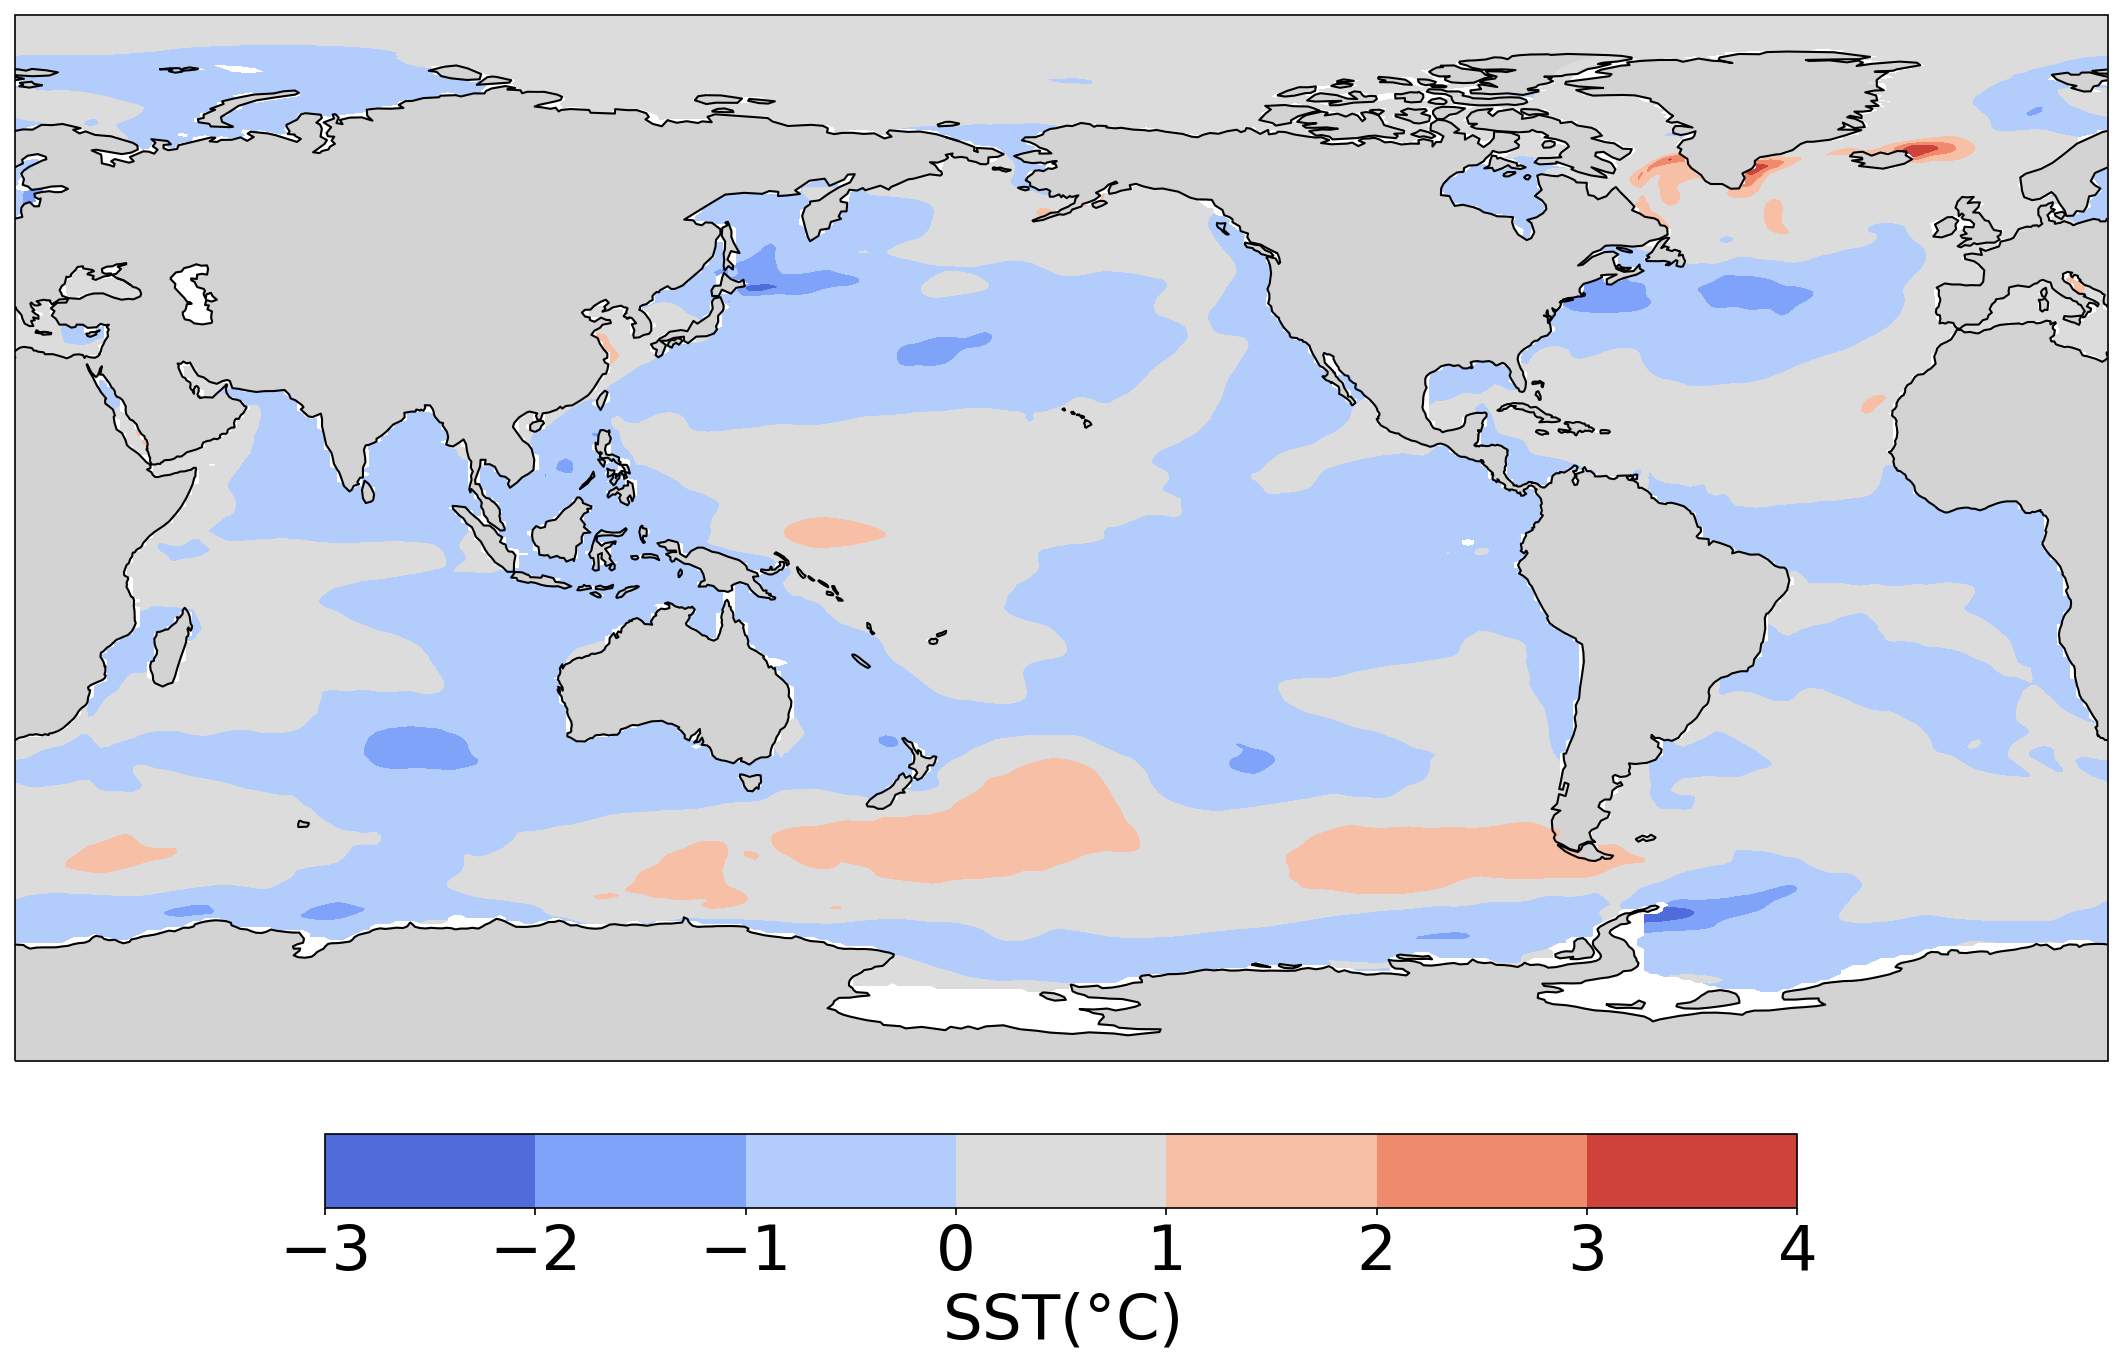

In [38]:
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude = -160)))

ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


p = plt.contourf(new_lons,new_lats,plot_data,
                transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('SST' + "($\degree$C)", size = 30)


### Volcano 2: Unidentified_1 1458

#### Preconditions El Nino/Neutral/La Nina

In [40]:
unident1 = data.sel(time=slice('1457-01-01 00:00:00','1457-12-31 00:00:00')).groupby('time.month').mean(dim='time')

In [43]:
unident1

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             month: 12, nlat: 384, nlon: 320)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 0.0001 0.0001 ... 0.0001 0.0001
    salinity_factor         (month) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (month) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (month) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (month) float64 8.297e+04 8.297e+04 ... 8.297e+04
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [45]:
unident1_anomaly=unident1-monthlydata
unident1_anomaly

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, month: 12)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 4.066e-20 4.066e-20 ... 4.066e-20
    salinity_factor         (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sflux_factor            (month) float64 -2.776e-17 -2.776e-17 ... -2.776e-17
    nsurface_t              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nsurface_u              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [46]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [48]:
unident1_rm=rolling_mean(unident1_anomaly['TEMP'][:,0,:,:],5,axis=0)

In [49]:
unident1_rm.shape

(8, 384, 320)

In [50]:
plot_data,new_lats,new_lons = pop_add_cyclic(unident1_rm[0],data['TLAT'],data['TLONG']) 

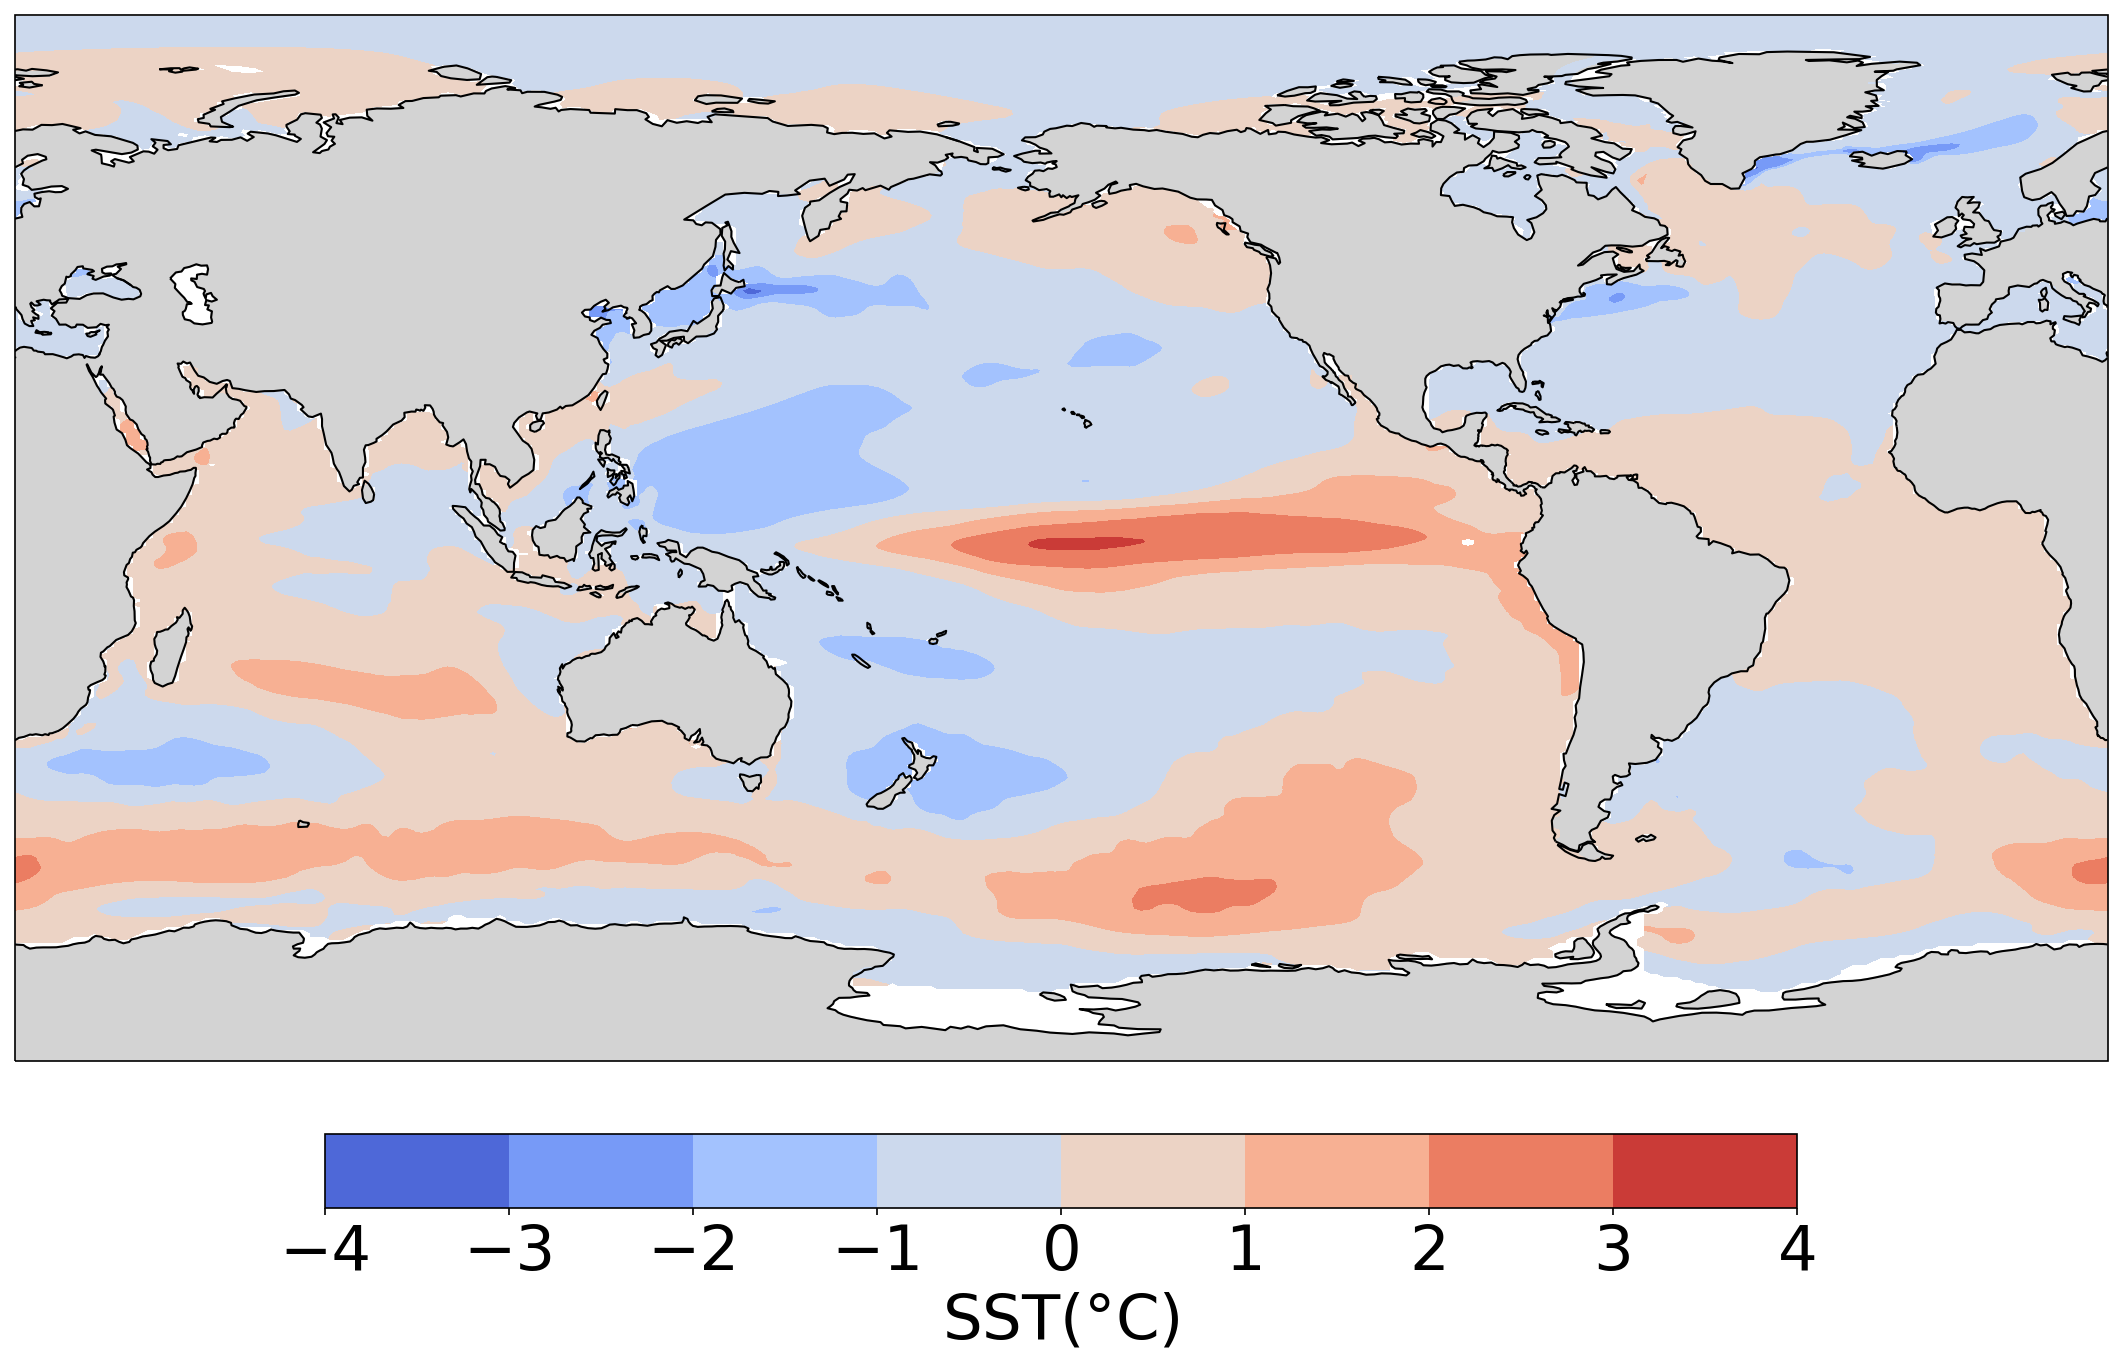

In [51]:
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude = -160)))

ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


p = plt.contourf(new_lons,new_lats,plot_data,
                transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('SST' + "($\degree$C)", size = 30)

### Volcano 3: Tambora 1815

#### Preconditions El Nino/Neutral/La Nina

In [52]:
tambora = data.sel(time=slice('1814-01-01 00:00:00','1814-12-31 00:00:00')).groupby('time.month').mean(dim='time')

In [53]:
tambora

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             month: 12, nlat: 384, nlon: 320)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 0.0001 0.0001 ... 0.0001 0.0001
    salinity_factor         (month) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (month) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (month) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (month) float64 8.297e+04 8.297e+04 ... 8.297e+04
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [54]:
tambora_anomaly = tambora-monthlydata
tambora_anomaly

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, month: 12)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 4.066e-20 4.066e-20 ... 4.066e-20
    salinity_factor         (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sflux_factor            (month) float64 -2.776e-17 -2.776e-17 ... -2.776e-17
    nsurface_t              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nsurface_u              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [55]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [56]:
tambora_rm=rolling_mean(tambora_anomaly['TEMP'][:,0,:,:],5,axis=0)

In [57]:
unident1_rm.shape

(8, 384, 320)

In [58]:
plot_data,new_lats,new_lons = pop_add_cyclic(tambora_rm[0],data['TLAT'],data['TLONG']) 

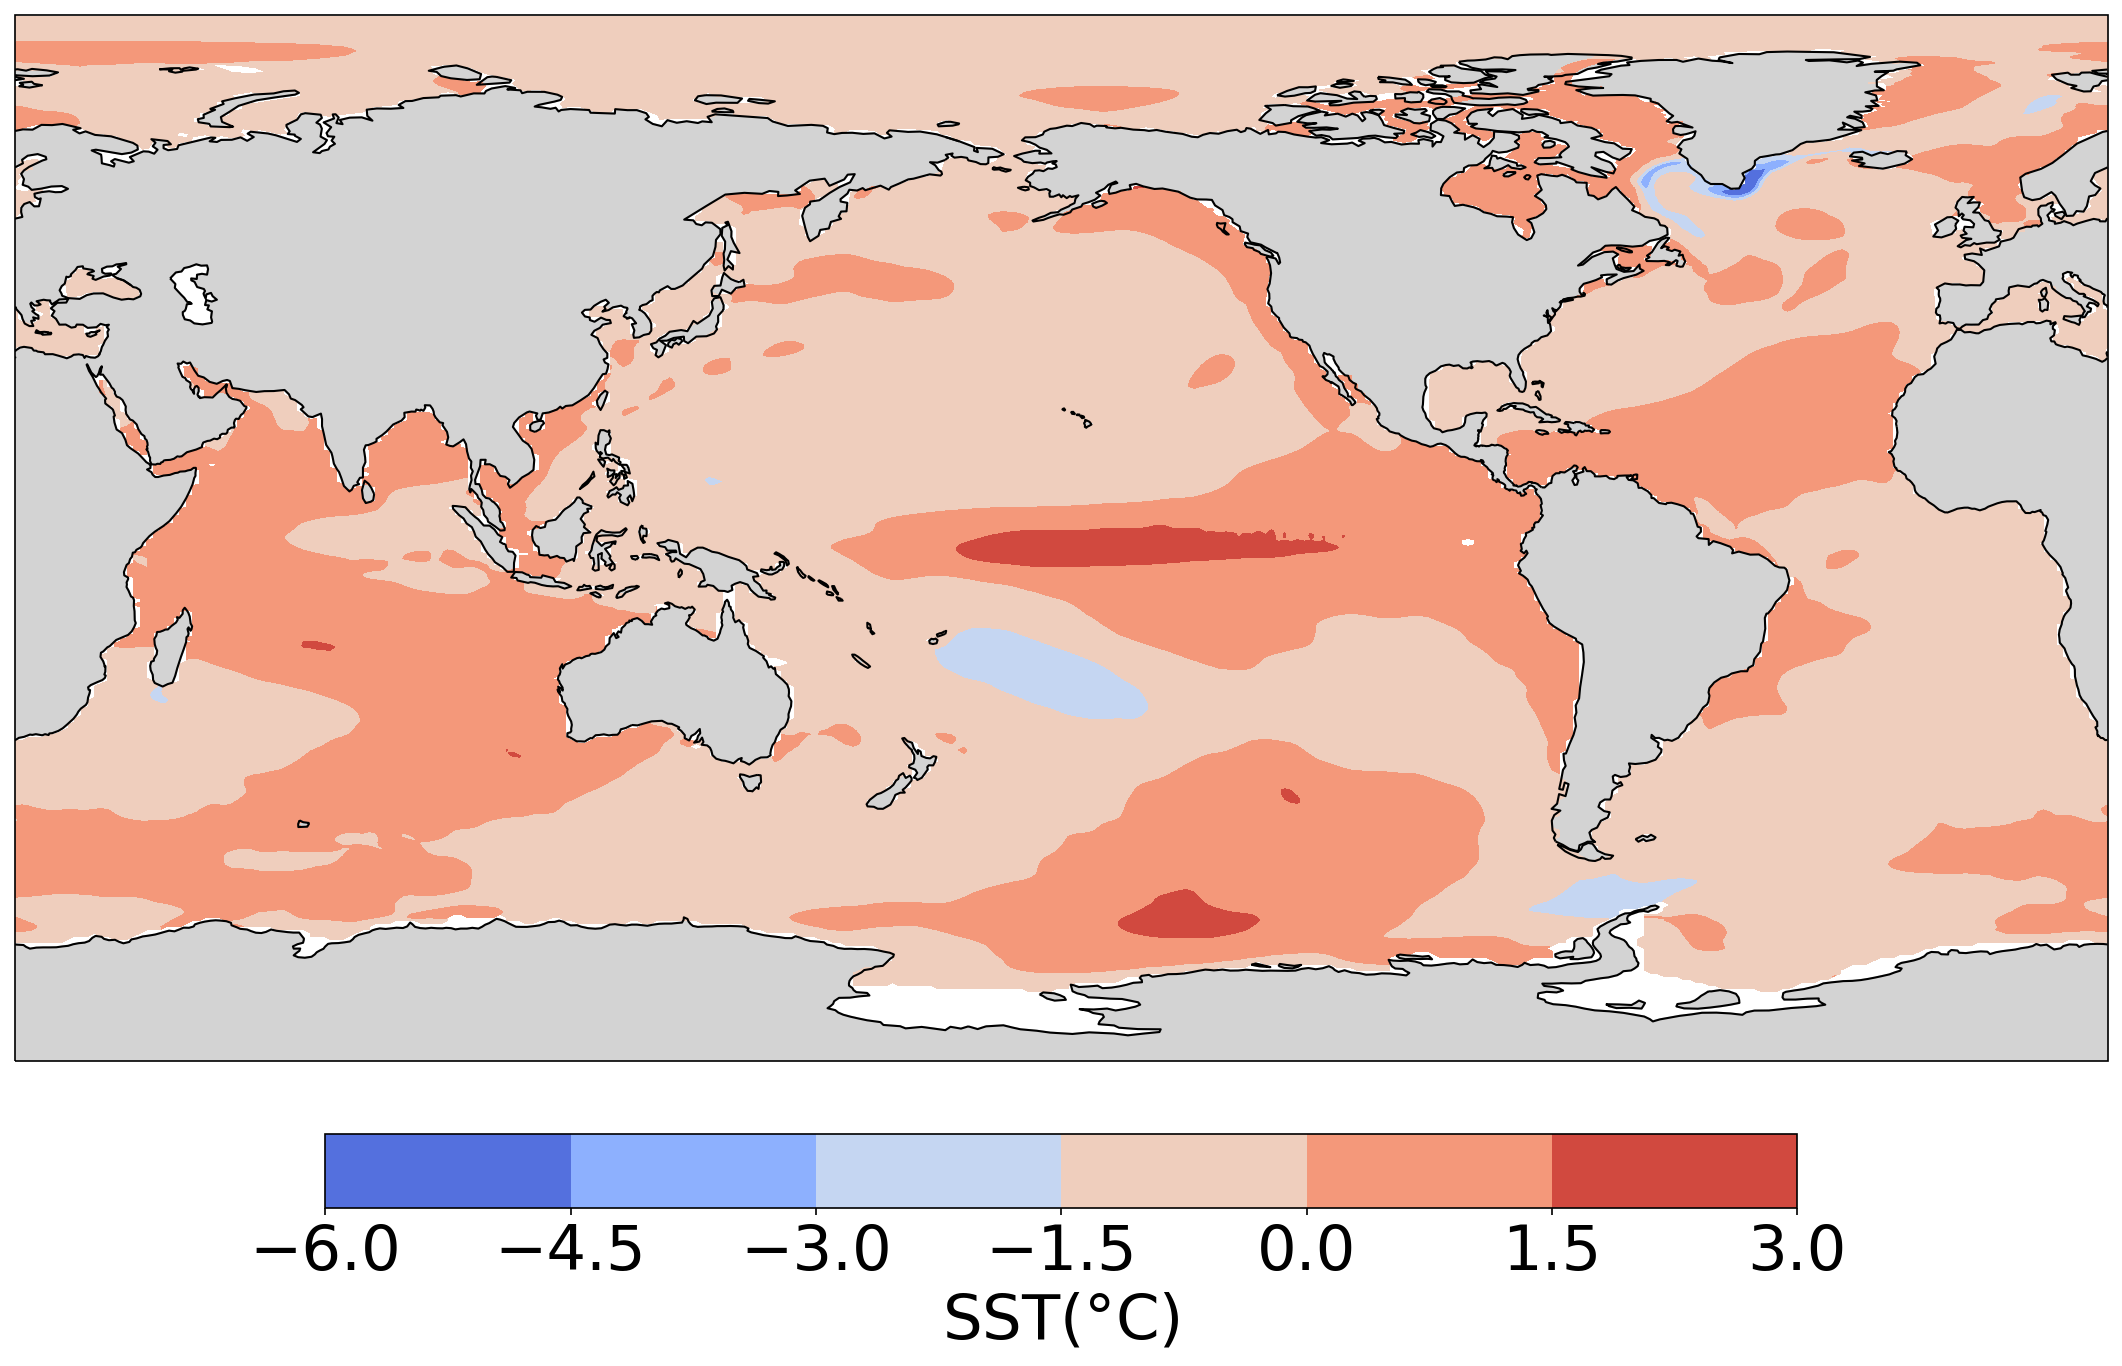

In [59]:
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude = -160)))

ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


p = plt.contourf(new_lons,new_lats,plot_data,
                transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('SST' + "($\degree$C)", size = 30)

### Volcano 4: Unidentified 2 1230

#### Preconditions El Nino/Neutral/La Nina

In [61]:
unident2 = data.sel(time=slice('1229-01-01 00:00:00','1229-12-31 00:00:00')).groupby('time.month').mean(dim='time')

In [63]:
unident2

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             month: 12, nlat: 384, nlon: 320)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 0.0001 0.0001 ... 0.0001 0.0001
    salinity_factor         (month) float64 -0.00347 -0.00347 ... -0.00347
    sflux_factor            (month) float64 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t              (month) float64 8.61e+04 8.61e+04 ... 8.61e+04
    nsurface_u              (month) float64 8.297e+04 8.297e+04 ... 8.297e+04
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [64]:
unident2_anomaly = unident2-monthlydata
unident2_anomaly

<xarray.Dataset>
Dimensions:                 (z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, month: 12)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/51)
    dz                      (month, z_t) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    dzw                     (month, z_w) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    KMT                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                     (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    REGION_MASK             (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    UAREA                   (month, nlat, nlon) float64 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                      ...
    fwflux_factor           (month) float64 4.066e-20 4.066e-20 ... 4.066e-20
    salinity_factor         (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sflux_factor            (month) float64 -2.776e-17 -2.776e-17 ... -2.776e-17
    nsurface_t              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nsurface_u              (month) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TEMP                    (month, z_t, nlat, nlon) float32 dask.array<chunksize=(1, 60, 384, 320), meta=np.ndarray>

In [65]:
from scipy.ndimage import uniform_filter1d

def rolling_mean(a, W, axis=-1):
    # a : Input ndarray
    # W : Window size
    # axis : Axis along which we will apply rolling/sliding mean
    hW = W//2
    L = a.shape[axis]-W+1   
    indexer = [slice(None) for _ in range(a.ndim)]
    indexer[axis] = slice(hW,hW+L)
    return uniform_filter1d(a,W,axis=axis)[tuple(indexer)]

In [ ]:
unident2_rm=rolling_mean(unident2_anomaly['TEMP'][:,0,:,:],5,axis=0)

In [ ]:
plot_data,new_lats,new_lons = pop_add_cyclic(unident2_rm[0],data['TLAT'],data['TLONG']) 

In [ ]:
fig,ax= plt.subplots(figsize =(18,13),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude = -160)))

ax.add_feature(cfeature.LAND, color = 'lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_global()


p = plt.contourf(new_lons,new_lats,plot_data,
                transform=ccrs.PlateCarree(),cmap='coolwarm',zorder=-1) # Update to: cmocean.cm.balance) in dkrz


cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax)
cbar.ax.tick_params(labelsize=30)
cbar.set_label('SST' + "($\degree$C)", size = 30)